# ML & Predictive Analytics: Final Project EDA


<br>


- **Goal of this assignment:** Classifying credit card fraud
- **Data for this assignment:** [Kaggle site](https://www.kaggle.com/mlg-ulb/creditcardfraud)



# Revised Data ETL

## Data cleaning, pre-processing, and test/train split

### Import necessary packages

In [1]:
# Base packages
import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore')
import timeit

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import pickle

# Parameterization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Evaluation
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

### Import the data and verify dimensions

In [2]:
df = pd.read_csv('C:/Users/p_adu/creditcard.csv')

print("The shape of the train set is {} rows by {} columns".format(df.shape[0],df.shape[1]))
df.head(2)

The shape of the train set is 284807 rows by 31 columns


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [3]:
df2 = pd.read_csv('C:/Users/p_adu/creditcard.csv')
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Retool time to be 0-24 hour feature instead of continuous second count

In [4]:
def time(sec):
    day = sec // 86400 + 1
    if day <= 1:
        return round((sec / 60 / 60),2)
    else:
        return round(((sec - (24*60*60*(day-1))) / 60 / 60),2)

df['Time'] = df.apply(lambda row: time(row['Time']), axis=1)

### Identify target variables and features before analyzing data to avoid any biasing

### Splitting data using traditional method and 'SMOTE' method

In [5]:
X = df.loc[:, df.columns != 'Class']
y = df.loc[:,'Class']
y = y.to_numpy().reshape(y.shape[0],1)
print(X.shape)
print(y.shape)

(284807, 30)
(284807, 1)


In [6]:
from scipy import stats
y.sum()

492

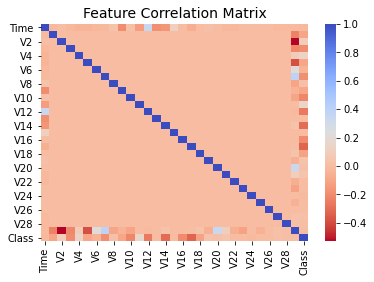

In [7]:
sub_sample_corr = df.iloc[:,:].corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':30})
plt.title('Feature Correlation Matrix', fontsize=14)
plt.show()

In [8]:
# Plot of the variance of our features highlights EXCLUDING Time AND Amount
X_train.boxplot(column=["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28"])

NameError: name 'X_train' is not defined

Text(0.5, 1.0, 'Time - before conversion')

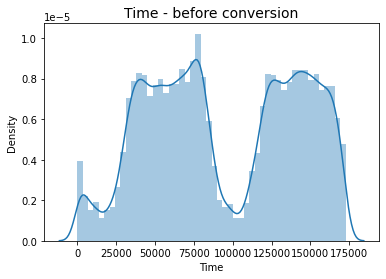

In [27]:
# Plot of the variance of our features highlights EXCLUDING Time AND Amount
sns.distplot(df2["Time"])
plt.title('Time - before conversion', fontsize=14)
# X.hist(column=["Time"])

Text(0.5, 1.0, 'Time - After conversion')

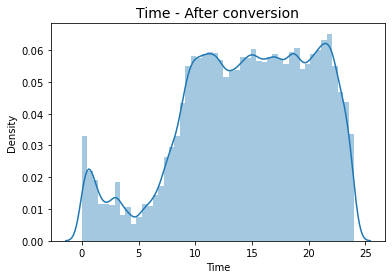

In [28]:
# Plot of the variance of our features highlights EXCLUDING Time AND Amount
sns.distplot(X["Time"])
plt.title('Time - After conversion', fontsize=14)

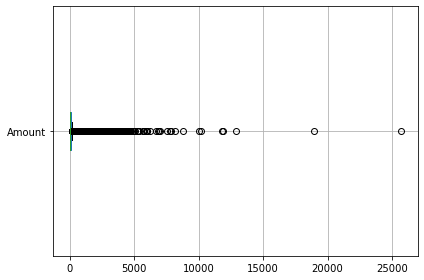

In [63]:
# Plot of the variance of our features highlights EXCLUDING Time AND Amount
X_train.boxplot(column=["Amount"],vert=False)
plt.tight_layout()

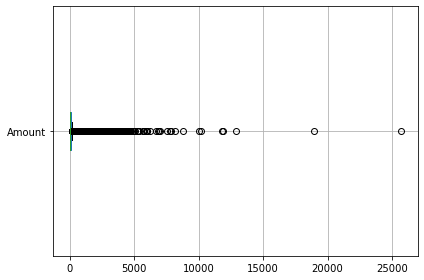

In [70]:
# Plot of the variance of our features highlights EXCLUDING Time AND Amount
X_train.boxplot(column=["Amount"],vert=False)
plt.tight_layout()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [8]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("\n")

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (170884, 30)
y_train shape: (170884, 1)


X_test shape: (113923, 30)
y_test shape: (113923, 1)


### Using SMOTE to split the data to deal with the imbalanced class

Note that we only SMOTE transform our train data.

In [9]:
k=1 # choosing number of minority classes
method = SMOTE(k_neighbors=k, sampling_strategy='auto', random_state = 1)

X_train_res, y_train_res = method.fit_sample(X_train, y_train)

print("SMOTE X_train shape: {}".format(X_train_res.shape))
print("SMOTE y_train shape: {}".format(y_train_res.shape))

SMOTE X_train shape: (341156, 30)
SMOTE y_train shape: (341156,)


Text(0.5, 1.0, 'Train y Observations: Before Oversampling')

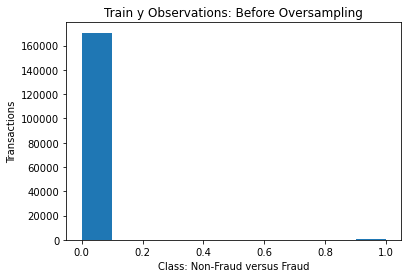

In [10]:
plt.hist(y_train)
plt.xlabel('Class: Non-Fraud versus Fraud')
plt.ylabel('Transactions')
plt.title('Train y Observations: Before Oversampling')

Text(0.5, 1.0, 'Train y Observations: After Oversampling')

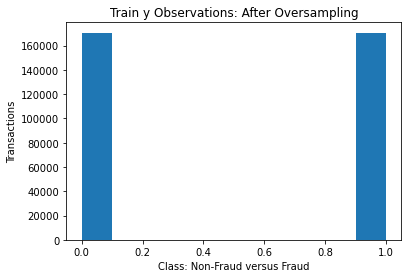

In [48]:
plt.hist(y_train_res)
plt.xlabel('Class: Non-Fraud versus Fraud')
plt.ylabel('Transactions')
plt.title('Train y Observations: After Oversampling')

### Step E: Scale all features / predictors

SVM requires scaling... Might (might not) choose to scale data

In [10]:
### SCALING DATA ####
scaler = RobustScaler()
scaler.fit_transform(X_train)
scaler.fit(X_test)

### Scaling SMOTE train data as well ####
scaler.fit_transform(X_train_res)


# Logistic Regression (base model)

# Decision Trees, Random Forest, and Bagging

# Boosting Models

## AdaBoost Classifier - GridSearch:

Start by creating a simple AdaBoostClassifier only using default parameters.

Note: sklearn defaults to a max_depth of 1 for AdaBoost. Read more in the documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [66]:
adaModel = AdaBoostClassifier(random_state=1)
adaModel.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [67]:
#create a dictionary of parameters 
param_grid = {
    'random_state':[1],
    'n_estimators':[100,400],
    'learning_rate':[0.2,1.2]
}

# Create gridsearch object with various combinations of parameters
ada_Grid = GridSearchCV(adaModel, param_grid, cv = 5, scoring = 'recall',refit = True, n_jobs=-1, verbose = 5)

In [76]:
# #---------------WARNING. TAKES FOREVER TO RUN---------------



ada_Grid.fit(X_train,y_train)



# #---------------WARNING. TAKES FOREVER TO RUN---------------

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  9.7min remaining:  9.7min
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed: 14.7min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 21.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 21.5min finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 1.2],
                         'n_estimators': [100, 400], 'random_state': [1]},
             scoring='recall', verbose=5)

In [77]:
print("Best parameters: {}".format(ada_Grid.best_params_))
print("\nBest estimator: {}".format(ada_Grid.best_estimator_))
print("\nBest estimator: {}".format(ada_Grid.best_score_))

Best parameters: {'learning_rate': 1.2, 'n_estimators': 400, 'random_state': 1}

Best estimator: AdaBoostClassifier(learning_rate=1.2, n_estimators=400, random_state=1)

Best estimator: 0.7648863035430989


In [93]:
def timer(start_time=None):
     if not start_time:
        start_time = datetime.now()
        return start_time
     elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
adaModel = AdaBoostClassifier(random_state=1, n_estimators=400, learning_rate=1.2)
adaModel.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 5 minutes and 22.59 seconds.


In [71]:
import pickle
# save model to file
pickle.dump(adaModel, open("Ada.pickle.dat", "wb"))
print("Saved model")

Saved model


In [78]:
# load model from file
loaded_model = pickle.load(open("Ada.pickle.dat", "rb"))
print("Loaded model")

Loaded model


In [94]:
ada_pred_prob = adaModel.predict_proba(X_test)
ada_pred = adaModel.predict(X_test)

### Calculate the confusion matrix and classification report (both are in sklearn.metrics).

In [95]:
# Create Classification Report
ada_class_report = classification_report(y_test,ada_pred)
print(ada_class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.91      0.73      0.81       186

    accuracy                           1.00    113923
   macro avg       0.95      0.87      0.90    113923
weighted avg       1.00      1.00      1.00    113923



### Identify the top 5 features. Feel free to print a list OR to make a plot.

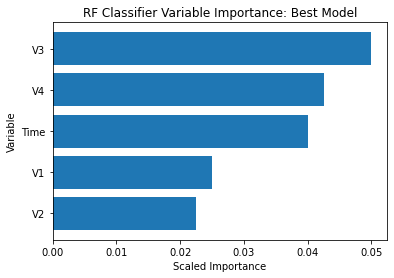

In [96]:
ada_importances = adaModel.feature_importances_[:5]

###Create a variable importance plot 
### resort the indices by importance of the specific feature 
sorted_indices = np.argsort(ada_importances)

####create range of 0-48
y_pos = range(len(ada_importances))
plt.barh(y_pos, ada_importances[sorted_indices], align='center')
plt.yticks(y_pos,X_test.columns[sorted_indices])

plt.title("RF Classifier Variable Importance: Best Model") # title 
plt.xlabel("Scaled Importance") #x axis label
plt.ylabel("Variable") # y axis label 
plt.show()

### Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?

As mentioned above, we can see that there is much much less overfitting going on here, which is outstanding! I'll verify it with my roc auc curves. As we can see below, the test and train data are predicted correctly at a similar rate to each other, indicating the gridsearch model did an excellent job selecting an optimal model that balances the bias/variance tradeoff well.

In [ ]:
#Drawing ROC curves and calculating AUC for train and test data
fpr, tpr, thresholds = roc_curve(y_test,ada_Grid.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

fpr_t, tpr_t, thresholds_t = roc_curve(y_train,ada_Grid.predict_proba(X_train)[:, 1])
roc_auc_t = auc(fpr_t, tpr_t)

plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Test Data AUC = %0.2f' % roc_auc, color = 'purple')
plt.plot(fpr_t, tpr_t, 'b', label = 'Train Data AUC = %0.2f' % roc_auc_t, color = 'orange')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## AdaBoost Classifier SMOTE - GridSearch:

In [81]:
adaModelSMOTE = AdaBoostClassifier(random_state=1)
adaModelSMOTE.fit(X_train_res, y_train_res)

AdaBoostClassifier(random_state=1)

In [82]:
#create a dictionary of parameters 
param_grid = {
    'random_state':[1],
    'n_estimators':[100,400],
    'learning_rate':[0.2,1.2]
}

# Create gridsearch object with various combinations of parameters
ada_GridSMOTE = GridSearchCV(adaModelSMOTE, param_grid, cv = 5, scoring = 'recall',refit = True, n_jobs=-1, verbose = 5)

In [83]:
# #---------------WARNING. TAKES FOREVER TO RUN---------------



ada_GridSMOTE.fit(X_train_res,y_train_res)



# #---------------WARNING. TAKES FOREVER TO RUN---------------

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed: 15.8min remaining: 15.8min
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed: 114.3min remaining: 38.1min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 124.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 124.6min finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 1.2],
                         'n_estimators': [100, 400], 'random_state': [1]},
             scoring='recall', verbose=5)

In [84]:
print("Best parameters: {}".format(ada_GridSMOTE.best_params_))
print("\nBest estimator: {}".format(ada_GridSMOTE.best_estimator_))
print("\nBest estimator: {}".format(ada_GridSMOTE.best_score_))

Best parameters: {'learning_rate': 1.2, 'n_estimators': 400, 'random_state': 1}

Best estimator: AdaBoostClassifier(learning_rate=1.2, n_estimators=400, random_state=1)

Best estimator: 0.9995368697260634


In [45]:
def timer(start_time=None):
     if not start_time:
        start_time = datetime.now()
        return start_time
     elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
adaModelSMOTE = AdaBoostClassifier(random_state=1, n_estimators=400, learning_rate=1.2)
adaModelSMOTE.fit(X_train_res, y_train_res)
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 15 minutes and 8.27 seconds.


In [ ]:
# save model to file
pickle.dump(adaModelSMOTE, open("AdaSMOTE.pickle.dat", "wb"))
print("Saved model")

In [79]:
# load model from file
adaSMOTEModel = pickle.load(open("AdaSMOTE.pickle.dat", "rb"))
print("Loaded model")

Loaded model


In [49]:
adaSMOTEModel = adaModelSMOTE

In [50]:
adaSMOTE_pred_prob = adaSMOTEModel.predict_proba(X_test)
adaSMOTE_pred = adaSMOTEModel.predict(X_test)
print("Done")

Done


### Calculate the confusion matrix and classification report (both are in sklearn.metrics).

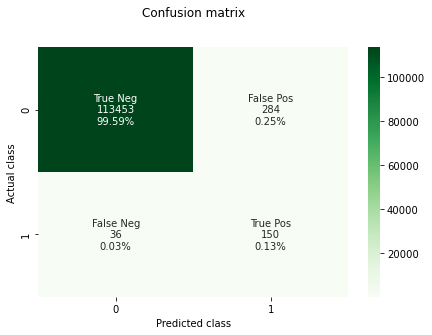

In [51]:
# Create Confusion Matrix
optimizedAdaMatrix = confusion_matrix(y_test,adaSMOTE_pred)

# Create label names
group_names = ['True Neg','False Pos','False Neg','True Pos']

# Extract counts from basic matrix arrays
group_counts = ["{0:0.0f}".format(value) for value in
                optimizedAdaMatrix.flatten()]

# Calculate percentages
group_percentages = ["{0:.2%}".format(value) for value in
                     optimizedAdaMatrix.flatten()/np.sum(optimizedAdaMatrix)]

# Create actual labels by zipping together previous lists
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create heatmap
sns.heatmap(optimizedAdaMatrix, annot=labels, fmt='', cmap='Greens')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
pass

In [52]:
# Create Classification Report
adaSMOTE_class_report = classification_report(y_test,adaSMOTE_pred)
print(adaSMOTE_class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.35      0.81      0.48       186

    accuracy                           1.00    113923
   macro avg       0.67      0.90      0.74    113923
weighted avg       1.00      1.00      1.00    113923



### Identify the top 5 features. Feel free to print a list OR to make a plot.

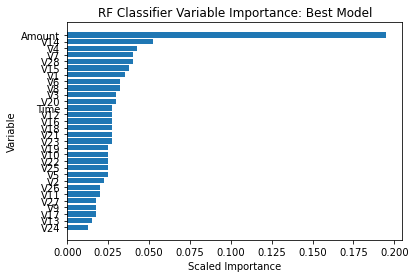

In [53]:
adaSMOTE_importances = adaModelSMOTE.feature_importances_

###Create a variable importance plot 
### resort the indices by importance of the specific feature 
sorted_indices = np.argsort(adaSMOTE_importances)

####create range of 0-48
y_pos = range(len(adaSMOTE_importances))
plt.barh(y_pos, adaSMOTE_importances[sorted_indices], align='center')
plt.yticks(y_pos,X_test.columns[sorted_indices])

plt.title("RF Classifier Variable Importance: Best Model") # title 
plt.xlabel("Scaled Importance") #x axis label
plt.ylabel("Variable") # y axis label 
plt.show()

## AdaBoost Classifier Predictions using best model on full dataset

In [19]:
def timer(start_time=None):
     if not start_time:
        start_time = datetime.now()
        return start_time
     elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
adaModelFullDataset = AdaBoostClassifier(random_state=1, n_estimators=400, learning_rate=1.2)
adaModelFullDataset.fit(X_train_res, y_train_res)
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 33 minutes and 47.91 seconds.


In [20]:
adaFull_pred_prob = adaModelFullDataset.predict_proba(X)
adaFull_pred = adaModelFullDataset.predict(X)
print("Done")

Done


### Calculate the confusion matrix and classification report (both are in sklearn.metrics).

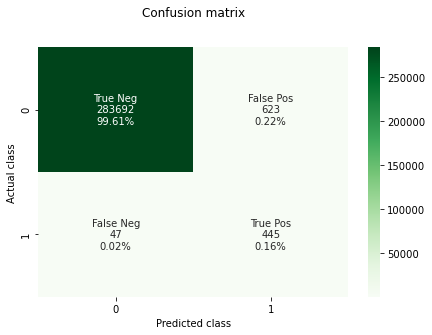

In [21]:
# Create Confusion Matrix
optimizedAdaMatrix = confusion_matrix(y,adaFull_pred)

# Create label names
group_names = ['True Neg','False Pos','False Neg','True Pos']

# Extract counts from basic matrix arrays
group_counts = ["{0:0.0f}".format(value) for value in
                optimizedAdaMatrix.flatten()]

# Calculate percentages
group_percentages = ["{0:.2%}".format(value) for value in
                     optimizedAdaMatrix.flatten()/np.sum(optimizedAdaMatrix)]

# Create actual labels by zipping together previous lists
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create heatmap
sns.heatmap(optimizedAdaMatrix, annot=labels, fmt='', cmap='Greens')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
pass

In [22]:
# Create Classification Report
adaFullData_class_report = classification_report(y,adaFull_pred)
print(adaFullData_class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.42      0.90      0.57       492

    accuracy                           1.00    284807
   macro avg       0.71      0.95      0.78    284807
weighted avg       1.00      1.00      1.00    284807



### Identify the top 5 features. Feel free to print a list OR to make a plot.

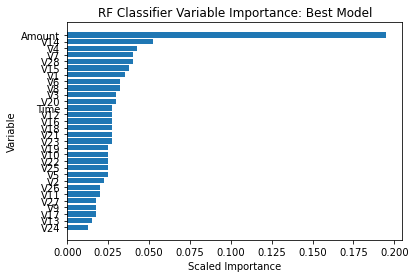

In [102]:
adaFullData_importances = adaModelFullDataset.feature_importances_

###Create a variable importance plot 
### resort the indices by importance of the specific feature 
sorted_indices = np.argsort(adaFullData_importances)

####create range of 0-48
y_pos = range(len(sorted_indices))
plt.barh(y_pos, adaFullData_importances[sorted_indices], align='center')
plt.yticks(y_pos,X.columns[sorted_indices])

plt.title("RF Classifier Variable Importance: Best Model") # title 
plt.xlabel("Scaled Importance") #x axis label
plt.ylabel("Variable") # y axis label 
plt.show()

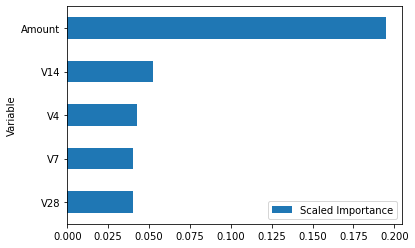

In [152]:
mydata = {"Variable": X.columns[sorted_indices], "Scaled Importance": adaFullData_importances[sorted_indices]}
Importances = pd.DataFrame(mydata)
MyImportances = Importances.sort_values(by=['Scaled Importance'], ascending = False)[0:5]
MyImportancescopy = MyImportances.copy()[0:5]
ax = MyImportancescopy.plot.barh(x='Variable', y='Scaled Importance')
ax.invert_yaxis()

## Gradient Boosting Classifier - GridSearch:

Use GradientBoostingClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following hyperparameters:

In [85]:
GradBoostModel = GradientBoostingClassifier(random_state=1)
GradBoostModel.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

a) Use GradientBoostingClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following hyperparameters:

 - n_estimators: 100, 200, 300, 400
 - learning_rate: choose 3 learning rates of your choice
 - max_depth: 1, 2 (you can try deeper, but remember part of the value of boosting stems from minimal complexity of trees)
 - Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and for scoring use "roc_auc" (this is the score that will be referenced when identifying the best parameters).

This run took 8 minutes for your TA.

In [86]:
#create a dictionary of parameters 
param_grid = {
    'random_state':[1],
    'n_estimators':[100,250,400],
    'learning_rate':[.1,10,100],
    'max_depth':[1,2]
}

# Create gridsearch object with various combinations of parameters
GradBoost_Grid = GridSearchCV(GradBoostModel, param_grid, cv = 5, scoring = 'recall',refit = True, n_jobs=-1, verbose = 5)

Use 5 cross-fold and for scoring use "roc_auc". This is the score that will be referenced when identifying the best parameters.

In [87]:
#---------------WARNING. TAKES FOREVER TO RUN---------------



GradBoost_Grid.fit(X_train,y_train)



#---------------WARNING. TAKES FOREVER TO RUN---------------

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 127.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 164.6min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 10, 100], 'max_depth': [1, 2],
                         'n_estimators': [100, 250, 400], 'random_state': [1]},
             scoring='recall', verbose=5)

### Identify the best performing model

 - .best_params_() : This method outputs to best performing parameters
 - .best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test 

In [88]:
print("Best parameters: {}".format(GradBoost_Grid.best_params_))
print("\nBest estimator: {}".format(GradBoost_Grid.best_estimator_))
print("\nBest estimator: {}".format(GradBoost_Grid.best_score_))

Best parameters: {'learning_rate': 10, 'max_depth': 1, 'n_estimators': 100, 'random_state': 1}

Best estimator: GradientBoostingClassifier(learning_rate=10, max_depth=1, random_state=1)

Best estimator: 1.0


### Running, timing, and saving 'optimal' model

In [113]:
def timer(start_time=None):
     if not start_time:
        start_time = datetime.now()
        return start_time
     elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
GradModel = GradientBoostingClassifier(learning_rate=10, max_depth=3,n_estimators=100,random_state=1)
GradModel.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 3 minutes and 15.07 seconds.


In [ ]:
import pickle
# save model to file
pickle.dump(GradModel, open("GradModel.pickle.dat", "wb"))
print("Saved model")

In [ ]:
# load model from file
loaded_model = pickle.load(open("GradModel.pickle.dat", "rb"))
print("Loaded model")

Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

### Re-running the 'optimal' gradient boosting model

In [ ]:
# GradBoost_Grid = GradientBoostingClassifier(learning_rate=10, max_depth=2,n_estimators=100,random_state=1)
# GradBoost_Grid.fit(X_train, y_train)

In [114]:
GradBoost_pred_prob = GradModel.predict_proba(X_test)
GradBoost_pred = GradModel.predict(X_test)

### Calculate the confusion matrix and classification report (both are in sklearn.metrics).

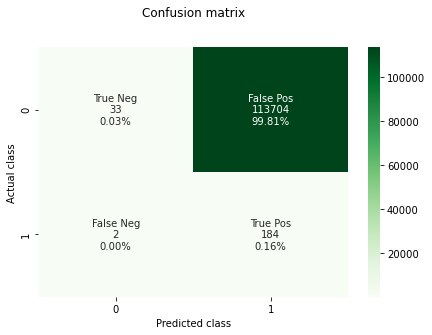

In [115]:
# Create Confusion Matrix
optimizedRFMatrix = confusion_matrix(y_test,GradBoost_pred)

# Create label names
group_names = ['True Neg','False Pos','False Neg','True Pos']

# Extract counts from basic matrix arrays
group_counts = ["{0:0.0f}".format(value) for value in
                optimizedRFMatrix.flatten()]

# Calculate percentages
group_percentages = ["{0:.2%}".format(value) for value in
                     optimizedRFMatrix.flatten()/np.sum(optimizedRFMatrix)]

# Create actual labels by zipping together previous lists
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create heatmap
sns.heatmap(optimizedRFMatrix, annot=labels, fmt='', cmap='Greens')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
pass

In [116]:
# Create Classification Report
GradBoost_class_report = classification_report(y_test,GradBoost_pred)
print(GradBoost_class_report)

              precision    recall  f1-score   support

           0       0.94      0.00      0.00    113737
           1       0.00      0.99      0.00       186

    accuracy                           0.00    113923
   macro avg       0.47      0.49      0.00    113923
weighted avg       0.94      0.00      0.00    113923



### Identify the top 5 features. Feel free to print a list OR to make a plot.

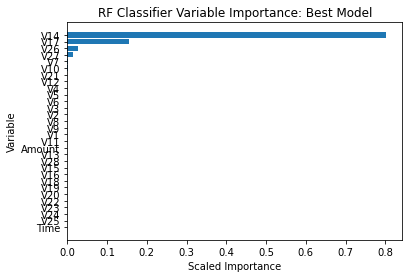

In [117]:
GradBoost_grid_clf_importances = GradModel.feature_importances_

###Create a variable importance plot 
### resort the indices by importance of the specific feature 
sorted_indices = np.argsort(GradBoost_grid_clf_importances)

####create range of 0-48
y_pos = range(len(GradBoost_grid_clf_importances))
plt.barh(y_pos, GradBoost_grid_clf_importances[sorted_indices], align='center')
plt.yticks(y_pos,X_test.columns[sorted_indices])

plt.title("RF Classifier Variable Importance: Best Model") # title 
plt.xlabel("Scaled Importance") #x axis label
plt.ylabel("Variable") # y axis label 
plt.show()

## Gradient Boosting Classifier with SMOTE - GridSearch:

Use GradientBoostingClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following hyperparameters:

In [89]:
GradBoostModelSMOTE = GradientBoostingClassifier(random_state=1)
GradBoostModelSMOTE.fit(X_train_res, y_train_res)

GradientBoostingClassifier(random_state=1)

a) Use GradientBoostingClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following hyperparameters:

 - n_estimators: 100, 200, 300, 400
 - learning_rate: choose 3 learning rates of your choice
 - max_depth: 1, 2 (you can try deeper, but remember part of the value of boosting stems from minimal complexity of trees)
 - Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and for scoring use "roc_auc" (this is the score that will be referenced when identifying the best parameters).

This run took 8 minutes for your TA.

In [90]:
#create a dictionary of parameters 
param_grid = {
    'random_state':[1],
    'n_estimators':[100,200,300,400],
    'learning_rate':[.1,10,100],
    'max_depth':[1,2]
}

# Create gridsearch object with various combinations of parameters
GradBoost_GridSMOTE = GridSearchCV(GradBoostModelSMOTE, param_grid, cv = 5, scoring = 'recall',refit = True, n_jobs=-1, verbose = 5)

Use 5 cross-fold and for scoring use "roc_auc". This is the score that will be referenced when identifying the best parameters.

In [91]:
#---------------WARNING. TAKES FOREVER TO RUN---------------



GradBoost_GridSMOTE.fit(X_train_res,y_train_res)



#---------------WARNING. TAKES FOREVER TO RUN---------------

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 149.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 463.4min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 10, 100], 'max_depth': [1, 2],
                         'n_estimators': [100, 200, 300, 400],
                         'random_state': [1]},
             scoring='recall', verbose=5)

### Identify the best performing model

 - .best_params_() : This method outputs to best performing parameters
 - .best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test 

In [92]:
print("Best parameters: {}".format(GradBoost_GridSMOTE.best_params_))
print("\nBest estimator: {}".format(GradBoost_GridSMOTE.best_estimator_))
print("\nBest estimator: {}".format(GradBoost_GridSMOTE.best_score_))

Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 400, 'random_state': 1}

Best estimator: GradientBoostingClassifier(max_depth=2, n_estimators=400, random_state=1)

Best estimator: 0.9983643848963062


### Running, timing, and saving 'optimal' model

In [108]:
def timer(start_time=None):
     if not start_time:
        start_time = datetime.now()
        return start_time
     elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
GradModelSMOTE = GradientBoostingClassifier(learning_rate=0.1, max_depth=2,n_estimators=400,random_state=1)
GradModelSMOTE.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 8 minutes and 35.24 seconds.


In [ ]:
import pickle
# save model to file
pickle.dump(GradModelSMOTE, open("GradModelSMOTE.pickle.dat", "wb"))
print("Saved model")

In [ ]:
# load model from file
loaded_model = pickle.load(open("GradModelSMOTE.pickle.dat", "rb"))
print("Loaded model")

Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

### Re-running the 'optimal' gradient boosting model

In [109]:
GradBoostSMOTE_pred_prob = GradModelSMOTE.predict_proba(X_test)
GradBoostSMOTE_pred = GradModelSMOTE.predict(X_test)

Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

### Calculate the confusion matrix and classification report (both are in sklearn.metrics).

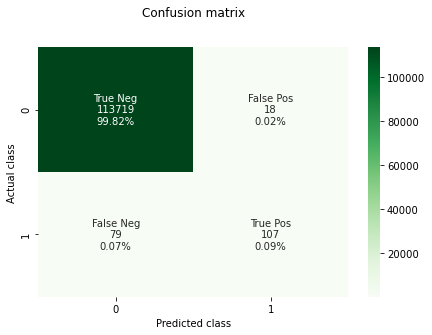

In [110]:
# Create Confusion Matrix
GradBoostSMOTEMatrix = confusion_matrix(y_test,GradBoostSMOTE_pred)

# Create label names
group_names = ['True Neg','False Pos','False Neg','True Pos']

# Extract counts from basic matrix arrays
group_counts = ["{0:0.0f}".format(value) for value in
                GradBoostSMOTEMatrix.flatten()]

# Calculate percentages
group_percentages = ["{0:.2%}".format(value) for value in
                     GradBoostSMOTEMatrix.flatten()/np.sum(GradBoostSMOTEMatrix)]

# Create actual labels by zipping together previous lists
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create heatmap
sns.heatmap(GradBoostSMOTEMatrix, annot=labels, fmt='', cmap='Greens')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
pass

In [111]:
# Create Classification Report
GradBoostSMOTE_class_report = classification_report(y_test,GradBoostSMOTE_pred)
print(GradBoostSMOTE_class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.86      0.58      0.69       186

    accuracy                           1.00    113923
   macro avg       0.93      0.79      0.84    113923
weighted avg       1.00      1.00      1.00    113923



### Identify the top 5 features. Feel free to print a list OR to make a plot.

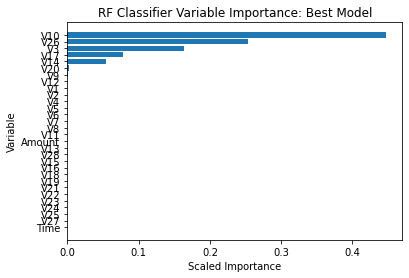

In [112]:
GradBoost_GridSMOTE_importances = GradModelSMOTE.feature_importances_

###Create a variable importance plot 
### resort the indices by importance of the specific feature 
sorted_indices = np.argsort(GradBoost_GridSMOTE_importances)

####create range of 0-48
y_pos = range(len(GradBoost_GridSMOTE_importances))
plt.barh(y_pos, GradBoost_GridSMOTE_importances[sorted_indices], align='center')
plt.yticks(y_pos,X_test.columns[sorted_indices])

plt.title("RF Classifier Variable Importance: Best Model") # title 
plt.xlabel("Scaled Importance") #x axis label
plt.ylabel("Variable") # y axis label 
plt.show()

## Gradient Boosting Classifier with FULL DATASET

### Running, timing, and saving 'optimal' model

In [11]:
def timer(start_time=None):
     if not start_time:
        start_time = datetime.now()
        return start_time
     elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
GradModelSMOTE = GradientBoostingClassifier(learning_rate=0.1, max_depth=2,n_estimators=400,random_state=1)
GradModelSMOTE.fit(X_train_res, y_train_res)
timer(start_time) # timing ends here for "start_time" variable

KeyboardInterrupt: 

### Re-running the 'optimal' gradient boosting model

In [ ]:
GradBoostFULL_pred_prob = GradModelSMOTE.predict_proba(X)
GradBoostFULL_pred = GradModelSMOTE.predict(X)
print("Done")

Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

### Calculate the confusion matrix and classification report (both are in sklearn.metrics).

In [ ]:
# Create Confusion Matrix
GradBoostSMOTEMatrix = confusion_matrix(y,GradBoostFULL_pred)

# Create label names
group_names = ['True Neg','False Pos','False Neg','True Pos']

# Extract counts from basic matrix arrays
group_counts = ["{0:0.0f}".format(value) for value in
                GradBoostSMOTEMatrix.flatten()]

# Calculate percentages
group_percentages = ["{0:.2%}".format(value) for value in
                     GradBoostSMOTEMatrix.flatten()/np.sum(GradBoostSMOTEMatrix)]

# Create actual labels by zipping together previous lists
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create heatmap
sns.heatmap(GradBoostSMOTEMatrix, annot=labels, fmt='', cmap='Greens')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
pass

In [29]:
# Create Classification Report
GradBoostFULL_class_report = classification_report(y,GradBoostFULL_pred)
print(GradBoostFULL_class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.32      0.92      0.48       492

    accuracy                           1.00    284807
   macro avg       0.66      0.96      0.74    284807
weighted avg       1.00      1.00      1.00    284807



### Identify the top 5 features. Feel free to print a list OR to make a plot.

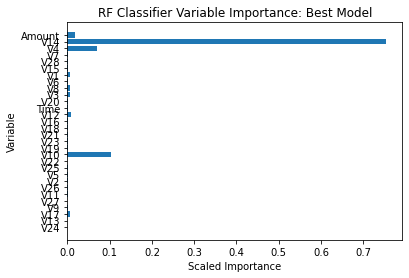

In [153]:
GradBoost_GridFULL_importances = GradModelSMOTE.feature_importances_

###Create a variable importance plot 
### resort the indices by importance of the specific feature 
GradBoostsorted_indices = np.argsort(GradBoost_GridFULL_importances)

####create range of 0-48
y_pos = range(len(GradBoost_GridFULL_importances))
plt.barh(y_pos, GradBoost_GridFULL_importances[sorted_indices], align='center')
plt.yticks(y_pos,X_test.columns[sorted_indices])

plt.title("RF Classifier Variable Importance: Best Model") # title 
plt.xlabel("Scaled Importance") #x axis label
plt.ylabel("Variable") # y axis label 
plt.show()

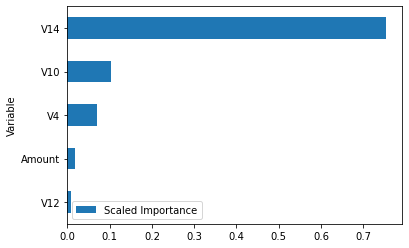

In [154]:
GradBoost_GridFULL_importances = GradModelSMOTE.feature_importances_

###Create a variable importance plot 
### resort the indices by importance of the specific feature 
GradBoostsorted_indices = np.argsort(GradBoost_GridFULL_importances)

mydata = {"Variable": X.columns[sorted_indices], "Scaled Importance": GradBoost_GridFULL_importances[sorted_indices]}
Importances = pd.DataFrame(mydata)
MyImportances = Importances.sort_values(by=['Scaled Importance'], ascending = False)[0:5]
MyImportancescopy = MyImportances.copy()[0:5]
ax = MyImportancescopy.plot.barh(x='Variable', y='Scaled Importance')
ax.invert_yaxis()